In [24]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats

In [3]:
# Census & gmaps API Keys
from config import (api_key, gkey)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [5]:
# Run Census Search to retrieve data on all states
# GROUP = "B25071"
#MEDIAN GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS (DOLLARS)

years=[2013,2014,2015,2016,2017,2018]

# Names for your columns
column1 = "Rent(%)"
column2 = "Owner Costs - House with mortgage(%)"
column3 = "Owner Costs - House without mortgage(%)"

median_rent_pd = pd.DataFrame()
all_years_df = pd.DataFrame()

states_list=[]
years_list=[]
column1_data =[]
column2_data =[]
column3_data =[]
state_number = []


for y in years:
    
    c = Census(api_key, year=y)
    
    #Give Names for your Groups
    median_rent_data = c.acs5.get(("NAME", "B25071_001E","B25092_002E", "B25092_003E"), 
                         {'for': 'state: *'})
    
        #To assing yeach value with specific year


    # Sorting to put states in the same order states in the table
    median_rent_pd = pd.DataFrame(median_rent_data).sort_values("NAME",ascending=True)
    median_rent_pd = median_rent_pd.reset_index()
    #print(median_rent_pd)
    
    year_column=[]
    for i in range(len(median_rent_pd["state"])):
        year_column.append(y)
    #print(year_column)
    
    #Adding all data into lists
    state_number.extend(median_rent_pd["state"].tolist())
    states_list.extend(median_rent_pd["NAME"].tolist())
    years_list.extend(year_column)
    column1_data.extend(median_rent_pd["B25071_001E"].tolist())
    column2_data.extend(median_rent_pd["B25092_002E"].tolist())
    column3_data.extend(median_rent_pd["B25092_003E"].tolist())    
    
#print(years_list)
#print(states_list)

all_years_df["Year"] = years_list
all_years_df["State Name"] = states_list
all_years_df["State Number"] = state_number
all_years_df[column1] = column1_data
all_years_df[column2] = column2_data
all_years_df[column3] = column3_data
    
all_years_df.head()
#print(states_list)

,Year,State Name,State Number,Rent(%),Owner Costs - House with mortgage(%),Owner Costs - House without mortgage(%)
0,2013,Alabama,01,31.1,21.9,11.6
1,2013,Alaska,02,27.8,23.2,10.9
2,2013,Arizona,04,30.8,24.8,11.1
3,2013,Arkansas,05,29.7,20.7,10.7
4,2013,California,06,33.7,29.2,11.3


In [6]:
cal_all_years = all_years_df.loc[all_years_df["State Name"]=="California"]

colorado_all_years = all_years_df.loc[all_years_df["State Name"]=="Colorado"]

florida_all_years = all_years_df.loc[all_years_df["State Name"]=="Florida"]

idaho_all_years = all_years_df.loc[all_years_df["State Name"]=="Idaho"]

oregon_all_years = all_years_df.loc[all_years_df["State Name"]=="Oregon"]

texas_all_years = all_years_df.loc[all_years_df["State Name"]=="Texas"]


cal_all_years

,Year,State Name,State Number,Rent(%),Owner Costs - House with mortgage(%),Owner Costs - House without mortgage(%)
4,2013,California,06,33.7,29.2,11.3
56,2014,California,06,33.8,28.3,11.3
108,2015,California,06,33.7,27.3,11.2
160,2016,California,06,33.4,26.5,11.1
212,2017,California,06,33.1,25.9,11.0
264,2018,California,06,32.8,25.5,11.0


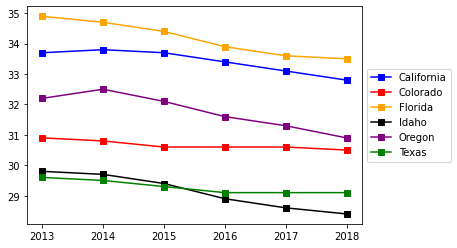

In [7]:
#Rent

x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Rent(%)"]
y_axis_co = colorado_all_years["Rent(%)"]
y_axis_fl = florida_all_years["Rent(%)"]
y_axis_id = idaho_all_years["Rent(%)"]
y_axis_or = oregon_all_years["Rent(%)"]
y_axis_tx = texas_all_years["Rent(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))


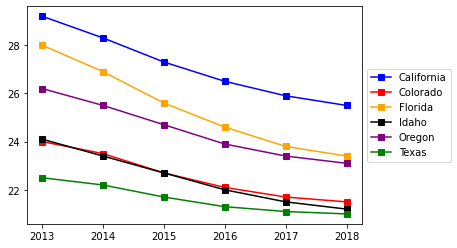

In [8]:
#Own cost House with Mortgage
#Rent

x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Owner Costs - House with mortgage(%)"]
y_axis_co = colorado_all_years["Owner Costs - House with mortgage(%)"]
y_axis_fl = florida_all_years["Owner Costs - House with mortgage(%)"]
y_axis_id = idaho_all_years["Owner Costs - House with mortgage(%)"]
y_axis_or = oregon_all_years["Owner Costs - House with mortgage(%)"]
y_axis_tx = texas_all_years["Owner Costs - House with mortgage(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))



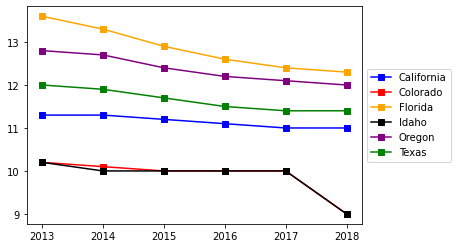

In [9]:
#Own cost House with Mortgage
#Rent

x_axis = cal_all_years["Year"]
y_axis_ca = cal_all_years["Owner Costs - House without mortgage(%)"]
y_axis_co = colorado_all_years["Owner Costs - House without mortgage(%)"]
y_axis_fl = florida_all_years["Owner Costs - House without mortgage(%)"]
y_axis_id = idaho_all_years["Owner Costs - House without mortgage(%)"]
y_axis_or = oregon_all_years["Owner Costs - House without mortgage(%)"]
y_axis_tx = texas_all_years["Owner Costs - House without mortgage(%)"]

california, = plt.plot(x_axis, y_axis_ca, marker="s",color="blue", label="California")
colorado, = plt.plot(x_axis, y_axis_co, marker="s",color="red", label="Colorado")
florida, = plt.plot(x_axis, y_axis_fl, marker="s",color="orange", label="Florida")
idaho, = plt.plot(x_axis, y_axis_id, marker="s",color="black", label="Idaho")
oregon, = plt.plot(x_axis, y_axis_or, marker="s",color="purple", label="Oregon")
texas, = plt.plot(x_axis, y_axis_tx, marker="s",color="green", label="Texas")

# Set our legend to where the chart thinks is best
plt.legend(handles=[california, colorado, florida, idaho, oregon, texas], loc="center left", bbox_to_anchor=(1, 0.5))

In [40]:
# Migration in US
# Study data files
migration_file_path = "Total_Migration_2013-2018_CSV.csv"

# Read the mouse data and the study results
migration_all_states_df = pd.read_csv(migration_file_path)
migration_all_states_df.head()

,Year,State Name,Move In,Move Out,Delta
0,2013.0,Alabama,104102.0,97219.0,6883.0
1,2013.0,Alaska,34360.0,99931.0,-65571.0
2,2013.0,Arizona,236146.0,183178.0,52968.0
3,2013.0,Arkansas,70621.0,76963.0,-6342.0
4,2013.0,California,485477.0,581679.0,-96202.0


In [43]:
# Combine the two dataframes into a single dataset
merge_data_df = pd.merge(all_years_df,migration_all_states_df, on=["Year","State Name"])
merge_data_df.head()

,Year,State Name,State Number,Rent(%),Owner Costs - House with mortgage(%),Owner Costs - House without mortgage(%),Move In,Move Out,Delta
0,2013,Alabama,01,31.1,21.9,11.6,104102.0,97219.0,6883.0
1,2013,Alaska,02,27.8,23.2,10.9,34360.0,99931.0,-65571.0
2,2013,Arizona,04,30.8,24.8,11.1,236146.0,183178.0,52968.0
3,2013,Arkansas,05,29.7,20.7,10.7,70621.0,76963.0,-6342.0
4,2013,California,06,33.7,29.2,11.3,485477.0,581679.0,-96202.0


The r-value is -0.3963972663398618


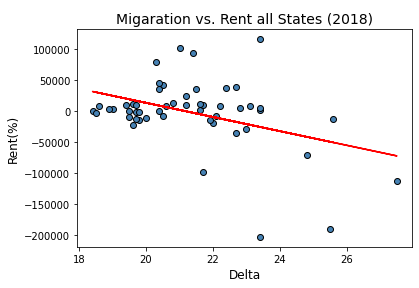

In [72]:
y_axis = merge_data_df['Delta'].loc[merge_data_df['Year']==2018]
x_axis = merge_data_df["Owner Costs - House with mortgage(%)"].loc[merge_data_df['Year']==2018]

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The r-value is {rvalue}")

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(18,150000),fontsize=15,color="red")
plt.title('Migaration vs. Rent all States (2018)',fontsize=(14))
plt.ylabel('Rent(%)',fontsize=(12))
plt.xlabel('Delta',fontsize=(12))

# Save the plotted figure as .pngs
#plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Max_Temperature.png")

plt.show()

In [61]:
#SElected States
selected_states_all_years = merge_data_df.loc[(merge_data_df["State Name"]=="California") | (merge_data_df["State Name"]=="Colorado") | (merge_data_df["State Name"]=="Florida") |
                                         (merge_data_df["State Name"]=="Idaho") | (merge_data_df["State Name"]=="Oregon") | (merge_data_df["State Name"]=="Texas")]
selected_states_all_years.head()

,Year,State Name,State Number,Rent(%),Owner Costs - House with mortgage(%),Owner Costs - House without mortgage(%),Move In,Move Out,Delta
4,2013,California,06,33.7,29.2,11.3,485477.0,581679.0,-96202.0
5,2013,Colorado,08,30.9,24.0,10.2,206543.0,166348.0,40195.0
8,2013,Florida,12,34.9,28.0,13.6,529406.0,423995.0,105411.0
11,2013,Idaho,16,29.8,24.1,10.2,61592.0,63788.0,-2196.0
36,2013,Oregon,41,32.2,26.2,12.8,143841.0,111680.0,32161.0


The r-value is -0.4236401338877221


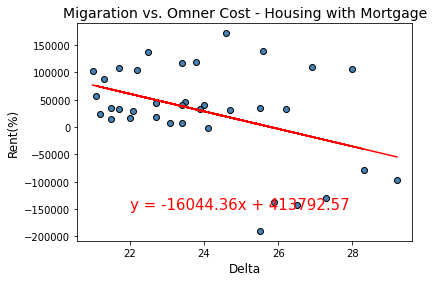

In [70]:
y_axis = selected_states_all_years['Delta']
x_axis = selected_states_all_years["Owner Costs - House with mortgage(%)"]

#Plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
print(f"The r-value is {rvalue}")

regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, facecolor = "steelblue", edgecolor = "black")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(22,-150000),fontsize=15,color="red")
plt.title('Migaration vs. Omner Cost - Housing with Mortgage',fontsize=(14))
plt.ylabel('Rent(%)',fontsize=(12))
plt.xlabel('Delta',fontsize=(12))

# Save the plotted figure as .pngs
#plt.savefig("Images/Northern_Hemisphere_City_Latitude_vs_Max_Temperature.png")

plt.show()

In [65]:
# Statistic test
group1 = selected_states_all_years['Delta']
group2 = selected_states_all_years["Owner Costs - House with mortgage(%)"]

stats.f_oneway(group1, group2)

F_onewayResult(statistic=4.3316531671091525, pvalue=0.04106932917249737)